In [28]:
import pandas as pd 
import numpy as np

import os

import matplotlib.pyplot as plt

In [29]:
wkdir = "/Users/chrisolen/Documents/uchicago_courses/deep_learning_and_image_recognition/finance/fin-portfolio-mvo/"
data_files = os.listdir(wkdir+'data')
data_files.remove('.DS_Store')

data = pd.read_csv(wkdir+'data/'+'data_cleaned.csv')

assets = ['VNQ_VANGREALEST','EMB_USDEMRGBOND','LQD_CORPBOND',
            'MUB_MUNIBOND','SHY_1-3USTR','VIG_VANGDIV','IVV_SP500','EEM_MSCIEMERGING',
            'XLE_ENERGYSPDR','EFA_MSCIEAFE','TIP_TIPSBOND']

# specify burn-in period
burn_in_length = 400

# load in portfolio values
portfolio = data[assets]

# remove burn-in period for which we are not making investment decisions
# first set of predicted weights apply to cum_returns for burn_in_length+2 
# because they are based on prediction for time_step burn_in_length+2
# burn_in_length+1 is for the initial portfolio weights which favor all assets equally

portfolio_day_one = portfolio.iloc[burn_in_length+1:,:] 
portfolio = portfolio.iloc[burn_in_length+2:,:].reset_index().drop(['index'], axis=1)

# load in daily weights
daily_portfolio_weights = pd.read_csv("daily_portfolio_weights.csv")
daily_portfolio_weights.drop(["Unnamed: 0"], axis=1, inplace=True)
daily_portfolio_weights = daily_portfolio_weights.iloc[:-1,:] # remove last sample

# arbitrary
total_shares = 1000


In [30]:
# for time-step burn-in-period + 1

# initially the portfolio has equal shares per asset
initial_share_per_asset = np.repeat(total_shares/portfolio_day_one.shape[1], portfolio_day_one.shape[1])
# element-wise multiply initial shares per asset with asset values at burn-in-period + 1
initial_value = initial_share_per_asset * portfolio_day_one.iloc[0,:]
initial_value

VNQ_VANGREALEST     3465.454545
EMB_USDEMRGBOND     8882.727273
LQD_CORPBOND        9368.181818
MUB_MUNIBOND        9167.272727
SHY_1-3USTR         7585.454545
VIG_VANGDIV         3867.272727
IVV_SP500           9090.909091
EEM_MSCIEMERGING    3221.818182
XLE_ENERGYSPDR      4573.636364
EFA_MSCIEAFE        1532.727273
TIP_TIPSBOND        9155.454545
Name: 401, dtype: float64

In [31]:
# calculate 

portfolio_values = portfolio * daily_portfolio_weights
portfolio_values

,VNQ_VANGREALEST,EMB_USDEMRGBOND,LQD_CORPBOND,MUB_MUNIBOND,SHY_1-3USTR,VIG_VANGDIV,IVV_SP500,EEM_MSCIEMERGING,XLE_ENERGYSPDR,EFA_MSCIEAFE,TIP_TIPSBOND
0,0.384000,0.974400,1.021500,1.011200,0.834700,0.429200,91.008002,0.357600,0.508500,0.169400,1.003201
1,0.386000,0.969100,1.031400,1.010200,0.836100,0.430400,91.692001,0.363800,0.514700,0.171100,1.006501
2,0.382800,0.977300,1.031200,1.013500,0.836700,0.426700,90.945000,0.357200,0.507100,0.170500,1.005401
3,0.362400,0.970700,1.032900,1.013500,0.837600,0.419200,88.712999,0.343200,0.490700,0.166501,1.009001
4,0.366000,0.968700,1.030300,1.016801,0.837400,0.421450,89.567998,0.350700,0.495600,0.168201,1.011201
...,...,...,...,...,...,...,...,...,...,...,...
2552,0.919804,1.123905,1.272406,1.141305,0.848704,1.162305,2.896312,0.402702,0.564103,0.256101,104.687949
2553,0.928704,1.129305,1.277405,1.143705,0.850504,1.168905,2.920412,0.407902,0.570202,0.257301,105.020951
2554,0.934304,1.139205,1.282705,1.143705,0.850404,1.184705,2.960213,0.409702,0.573802,0.259201,105.344950
2555,0.932304,1.132805,1.276206,1.142805,0.849504,1.178205,2.946913,0.406302,0.568703,0.259701,105.056947


In [32]:
cumulative_portfolio_value = portfolio_values.sum(axis=1)

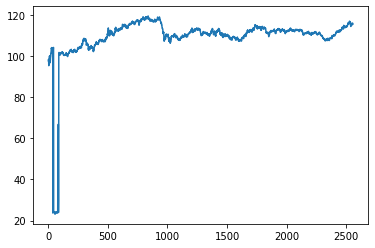

In [33]:
plt.plot(cumulative_portfolio_value)

In [45]:
log_returns = np.log(portfolio/portfolio.shift(1)).dropna()

In [46]:
portfolio_daily_returns = log_returns * daily_portfolio_weights.iloc[:-1,:]

In [49]:
cumulative_portfolio_daily_returns = portfolio_daily_returns.sum(axis=1)

In [52]:
cumulative_returns = np.cumsum(cumulative_portfolio_daily_returns)

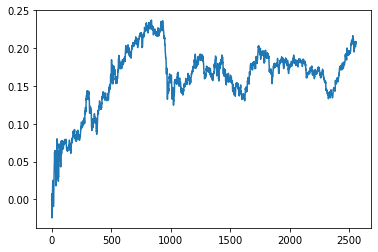

In [54]:
plt.plot(cumulative_returns)